In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Portfolio Projects/EDA - DS Salaries'
!ls

/content/drive/MyDrive/Portfolio Projects/EDA - DS Salaries
ds_salaries.csv  EDA_Project.ipynb


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from pandas.core.arrays import categorical
from matplotlib.ticker import FuncFormatter

# Load and Check Data

In [ ]:
# Read a CSV file named 'ds_salaries.csv' into a Pandas FataFrame called 'df'
df = pd.read_csv('ds_salaries.csv')

# Displays first 5 rows using 'head()' method
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
# Retrieve the number of rows and columns and print the dimensions
row_num = df.shape[0]
col_num = df.shape[1]
print('Dimension: ({}, {})'.format(row_num, col_num))

Dimension: (3755, 11)


In [ ]:
# Identify the value type for each column and see if there are any columns need to be converted to a new data type
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
# Check if there are any null/missing values in the dataset
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# Display the attributes of the dataset
col_val = df.columns.values
print(col_val)

['work_year' 'experience_level' 'employment_type' 'job_title' 'salary'
 'salary_currency' 'salary_in_usd' 'employee_residence' 'remote_ratio'
 'company_location' 'company_size']


Explanation of the Attributes:
*   work_year: The year the salary was paid
*   experience_level: The amount of practical knowledge gained through time working in the position
*   employment_type: The kinds of employees that an organization might hire or contract for employment
*   job_title: A name to describe a person's position
*   salary: The total amount of money earned as gross salary
*   salary_currency: The currency code - ISO 4217 - representing the currency in which the salary was paid
*   salary_in_usd: The equivalent value of the salary in US dollars (USD)
*   employee_residence: The primary country of residence of the employee during the working year, identified by an ISO 3166 country code
*   remote_ratio: The proportion of work performed remotely in relation to the total wprk done
*   company_location: The country where the employee's main office or contracting branch is located
*   company_size: The median number of individuals employed by the company throughout the year

In [ ]:
# Define and print 2 types of columns: categorical and numerical
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
numerical_columns = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
print(categorical_columns)
print(numerical_columns)

['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


In [ ]:
# Check how many unique values in a single column
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [ ]:
# Check how many values are duplicated?
duplicate = df.duplicated().sum()
print('Number of Duplicated Values: ', duplicate)

Number of Duplicated Values:  1171


In [ ]:
# Remove the duplicated values
df.loc[df.duplicated(), :]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [ ]:
# Calculate some statistical data of the numerical values
desc = df.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


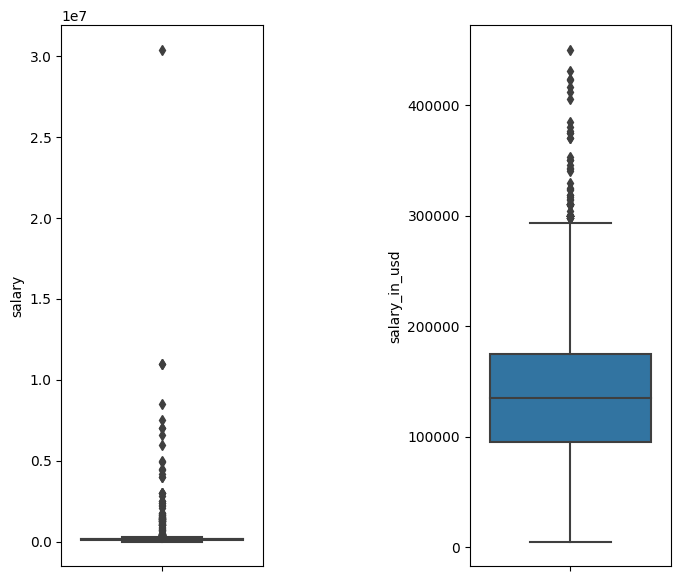

In [ ]:
# Detect outliers in numerical columns - salary and salary_in_usd
salary = df[['salary', 'salary_in_usd']]

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))
index = 0
axs = axs.flatten()
for k,v in salary.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=5.0, w_pad=9.0, h_pad=3.0)

**Summary of the Dataset**
*   The dataset includes 3755 rows and 11 columns
*   After getting rid of duplicated values, the dataset remains 1171 rows and 11 columns
*   There are technically no missing/null values in the dataset
*   There are 7 categorical and 4 numerical variables
*   The box plots have shown that features (salary, salary_in_usd) have outliers




# Exploratory Data Analysis (EDA)

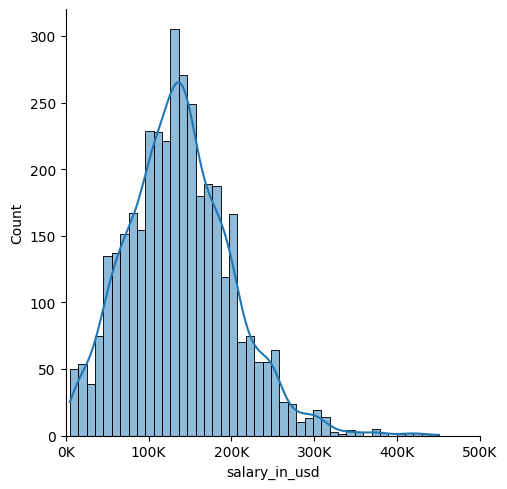

In [ ]:
# Plot a distribution of the 'salary_in_usd' column
f = lambda x, pos: f'{x/10**3:,.0f}K' # Convert the salary to thousands
g = sns.displot(x="salary_in_usd", data=df, kde=True)
g.set(xlim = (0,500000)) # Set the x-axis limit from 0 to 500K

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(f))
plt.show()

<Figure size 1200x500 with 0 Axes>

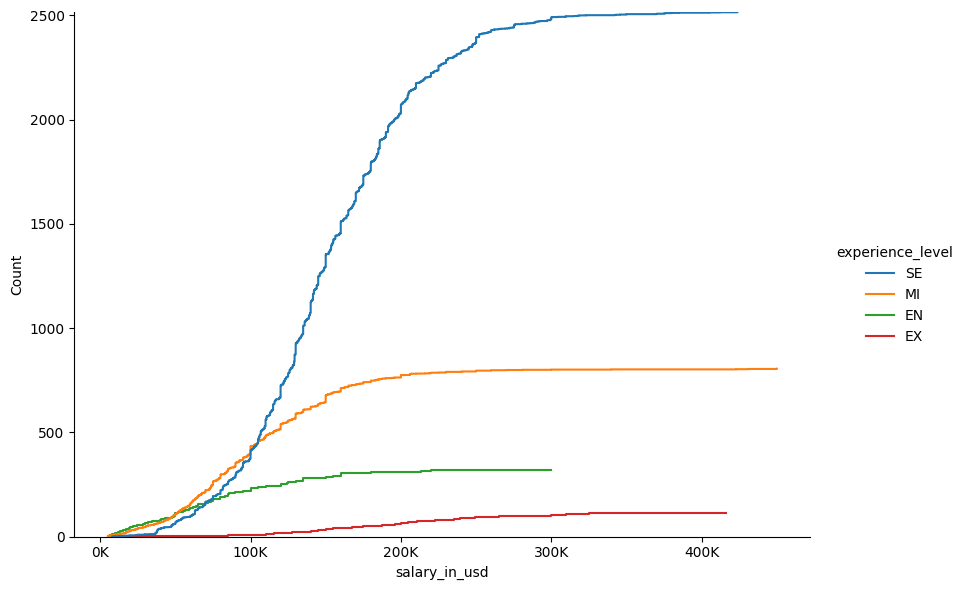

In [ ]:
# Plot a Empirical Cumulative Distribution for the 'salary_in_usd' column based on each experience level
f = lambda x, pos: f'{x/10**3:,.0f}K'
plt.figure(figsize=(12, 5))
ax = sns.displot(
  data=df,
  x="salary_in_usd",
  hue="experience_level",
  kind="ecdf",
  height=6,
  aspect=1.4,
  stat='count'
)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(f))
plt.show()

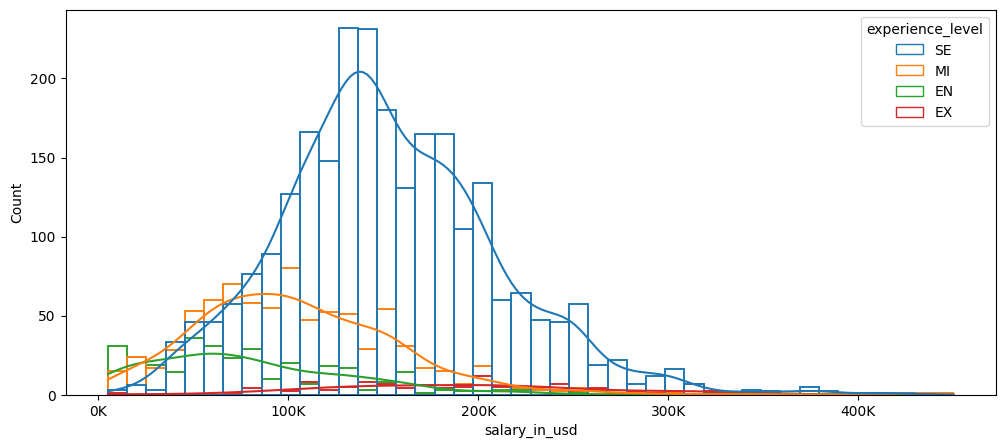

In [ ]:
# Plot a histogram for the salary column, differentiating by experience level
plt.figure(figsize=(12, 5))

sns.histplot(
    data=df,
    x="salary_in_usd",
    hue="experience_level",
    kde=True,
    stat="count",
    fill=False
)
f = lambda x, pos: f'{x/10**3:,.0f}K'
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(f))
plt.show()

From the analysis, here are some findings:
*   The salary range in USD for employees spans from 5,000 to 450,000 USD
*   Within the Data Science industry in the recorded period of years, the most common salary range for employees falls between 100,000 and 150,000 USD
*   A significant majority of employees earns around $130,000 per year, with over 300 individuals falling within this bracket
*   There are a few staff members, primarily executives and senior professionals, who earn higher annual salaries surpassing the rest. These individuals fall within the salary range of 250,000 to 450,000 USD

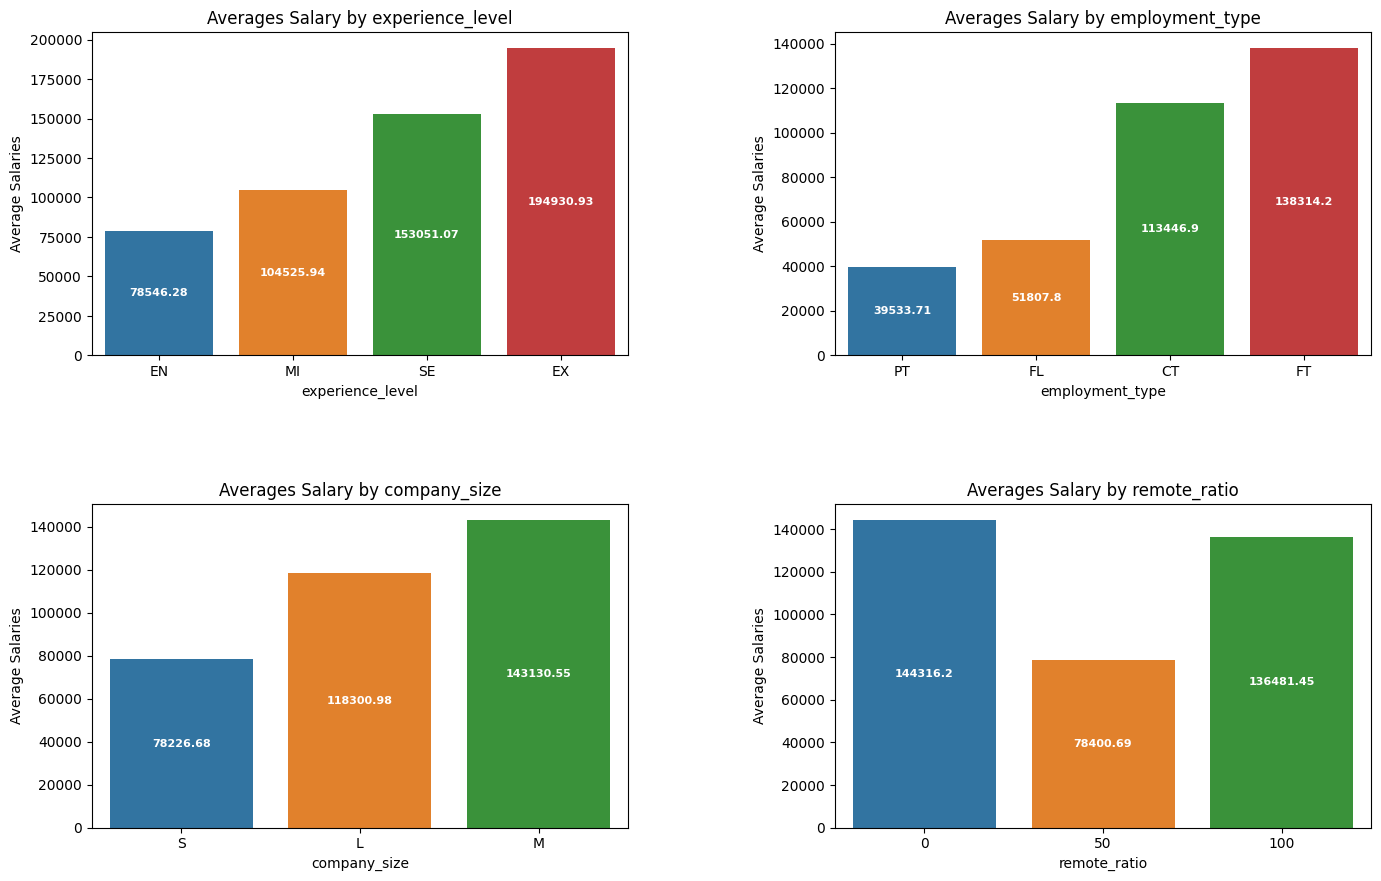

In [ ]:
# Calculate average salaries based on 4 categories - exp_level, employment_type, company_size, remote_ratio

categories = ['experience_level', 'employment_type', 'company_size', 'remote_ratio']
fig = plt.figure(figsize=(15,10))

a=1
for cat in categories:
  avg = df.groupby([cat], as_index=False).agg({'salary_in_usd':'mean'}).sort_values(by='salary_in_usd').reset_index(drop=True)

  plt.subplot(2,2,a)
  ax = sns.barplot(data=avg, x=cat, y='salary_in_usd', errorbar=('ci', False))

  for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2,
            y = i.get_height()/2,
            s = f"{round(i.get_height(),2)}",
            ha = 'center',
            va = 'center',
            size = 8,
            weight = 'bold',
            color = 'white')

  plt.title(f"Averages Salary by {cat}")
  plt.ylabel('Average Salaries')
  plt.xlabel(f"{cat}");
  a+=1

plt.tight_layout(pad=5.0, w_pad=9.0, h_pad=6.0)
plt.show()

The analysis regarding the average annual salaries based on 4 different categories, including experience level, employment type, company size, and remote ratio, has shown that:
*   Experience level: Executive members and senior employees fall into the category of high-salary earners. On average, executive members earn approximately 190,000 USD, which is twice the average salary of mid-level employees. Similarly, senior employees earn around 150,000 USD, which is double the average salary of entry-level employees.
*   Employment type: Full-time employees tend to earn the highest salaries, averaging around 140,000 USD per year. Contract employees follow closely behind, earning over 110,000 USD, which is double the average salary of freelancers and triple the average salary of part-time employees.
*   Company size: Medium-sized companies are more inclined to offer higher salaries to their employees. On average, employees in medium-sized companies earn around 143,000 USD per year. In comparison, employees in larger and smaller companies tend to have slightly lower average salaries.
*   Remote ratio: Hybrid workers earn the least on average compared to fully remote and on-site workers. The average annual salary for hybrid workers is approximately 78,000 USD.

These findings shed light on the salary trends within different employee groups, highlighting the distinctions based on job level, employment type, company size, and work arrangement.

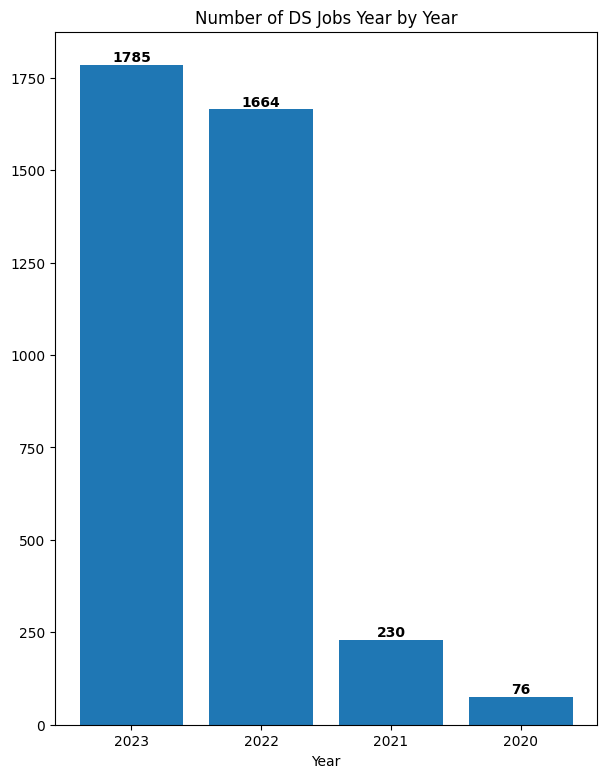

In [ ]:
# How DS industry has grown from year to year
# Shown by bar chart

fig = plt.figure(figsize=(7,9))
x = [str(i) for i in df['work_year'].value_counts().index]
y=df['work_year'].value_counts().values.tolist()

plt.bar(x,y)

for i, v in enumerate(y):
    plt.text(i, v, str(v), ha='center', va='bottom', color='black', fontweight='bold')
plt.xlabel('Year')
plt.title('Number of DS Jobs Year by Year')

plt.show()

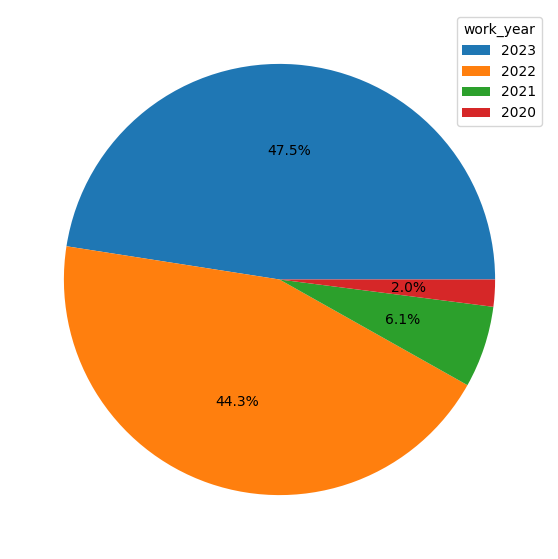

In [ ]:
# How DS industry has grown from year to year
# By pie chart
labels = df['work_year'].value_counts().keys()
values = df['work_year'].value_counts().values

fig = plt.figure(figsize=(7,7))

plt.pie(values, autopct='%1.1f%%')
plt.legend(labels, title='work_year')
plt.show()

Based on the bar and pie chart representing the number and percentage of employees in the industry year over year, we can see that:
*   In 2020, there were 76 employees, representing a small fraction (2%) of the workforce
*   By 2021, the number of employees had more than tripled to reach 230 (6.1%)
*   The year 2022 saw a significant surge, with the number of employees skyrocketing to 1,664 (44.3%)
*   In 2023, the upward trend continued, with 1,785 employees (47.5%) in the Data Science area

These figures demonstrate a substantial year-on-year increase in the employment opportunities within the Data Science industry, indicating its growing significance and demand.

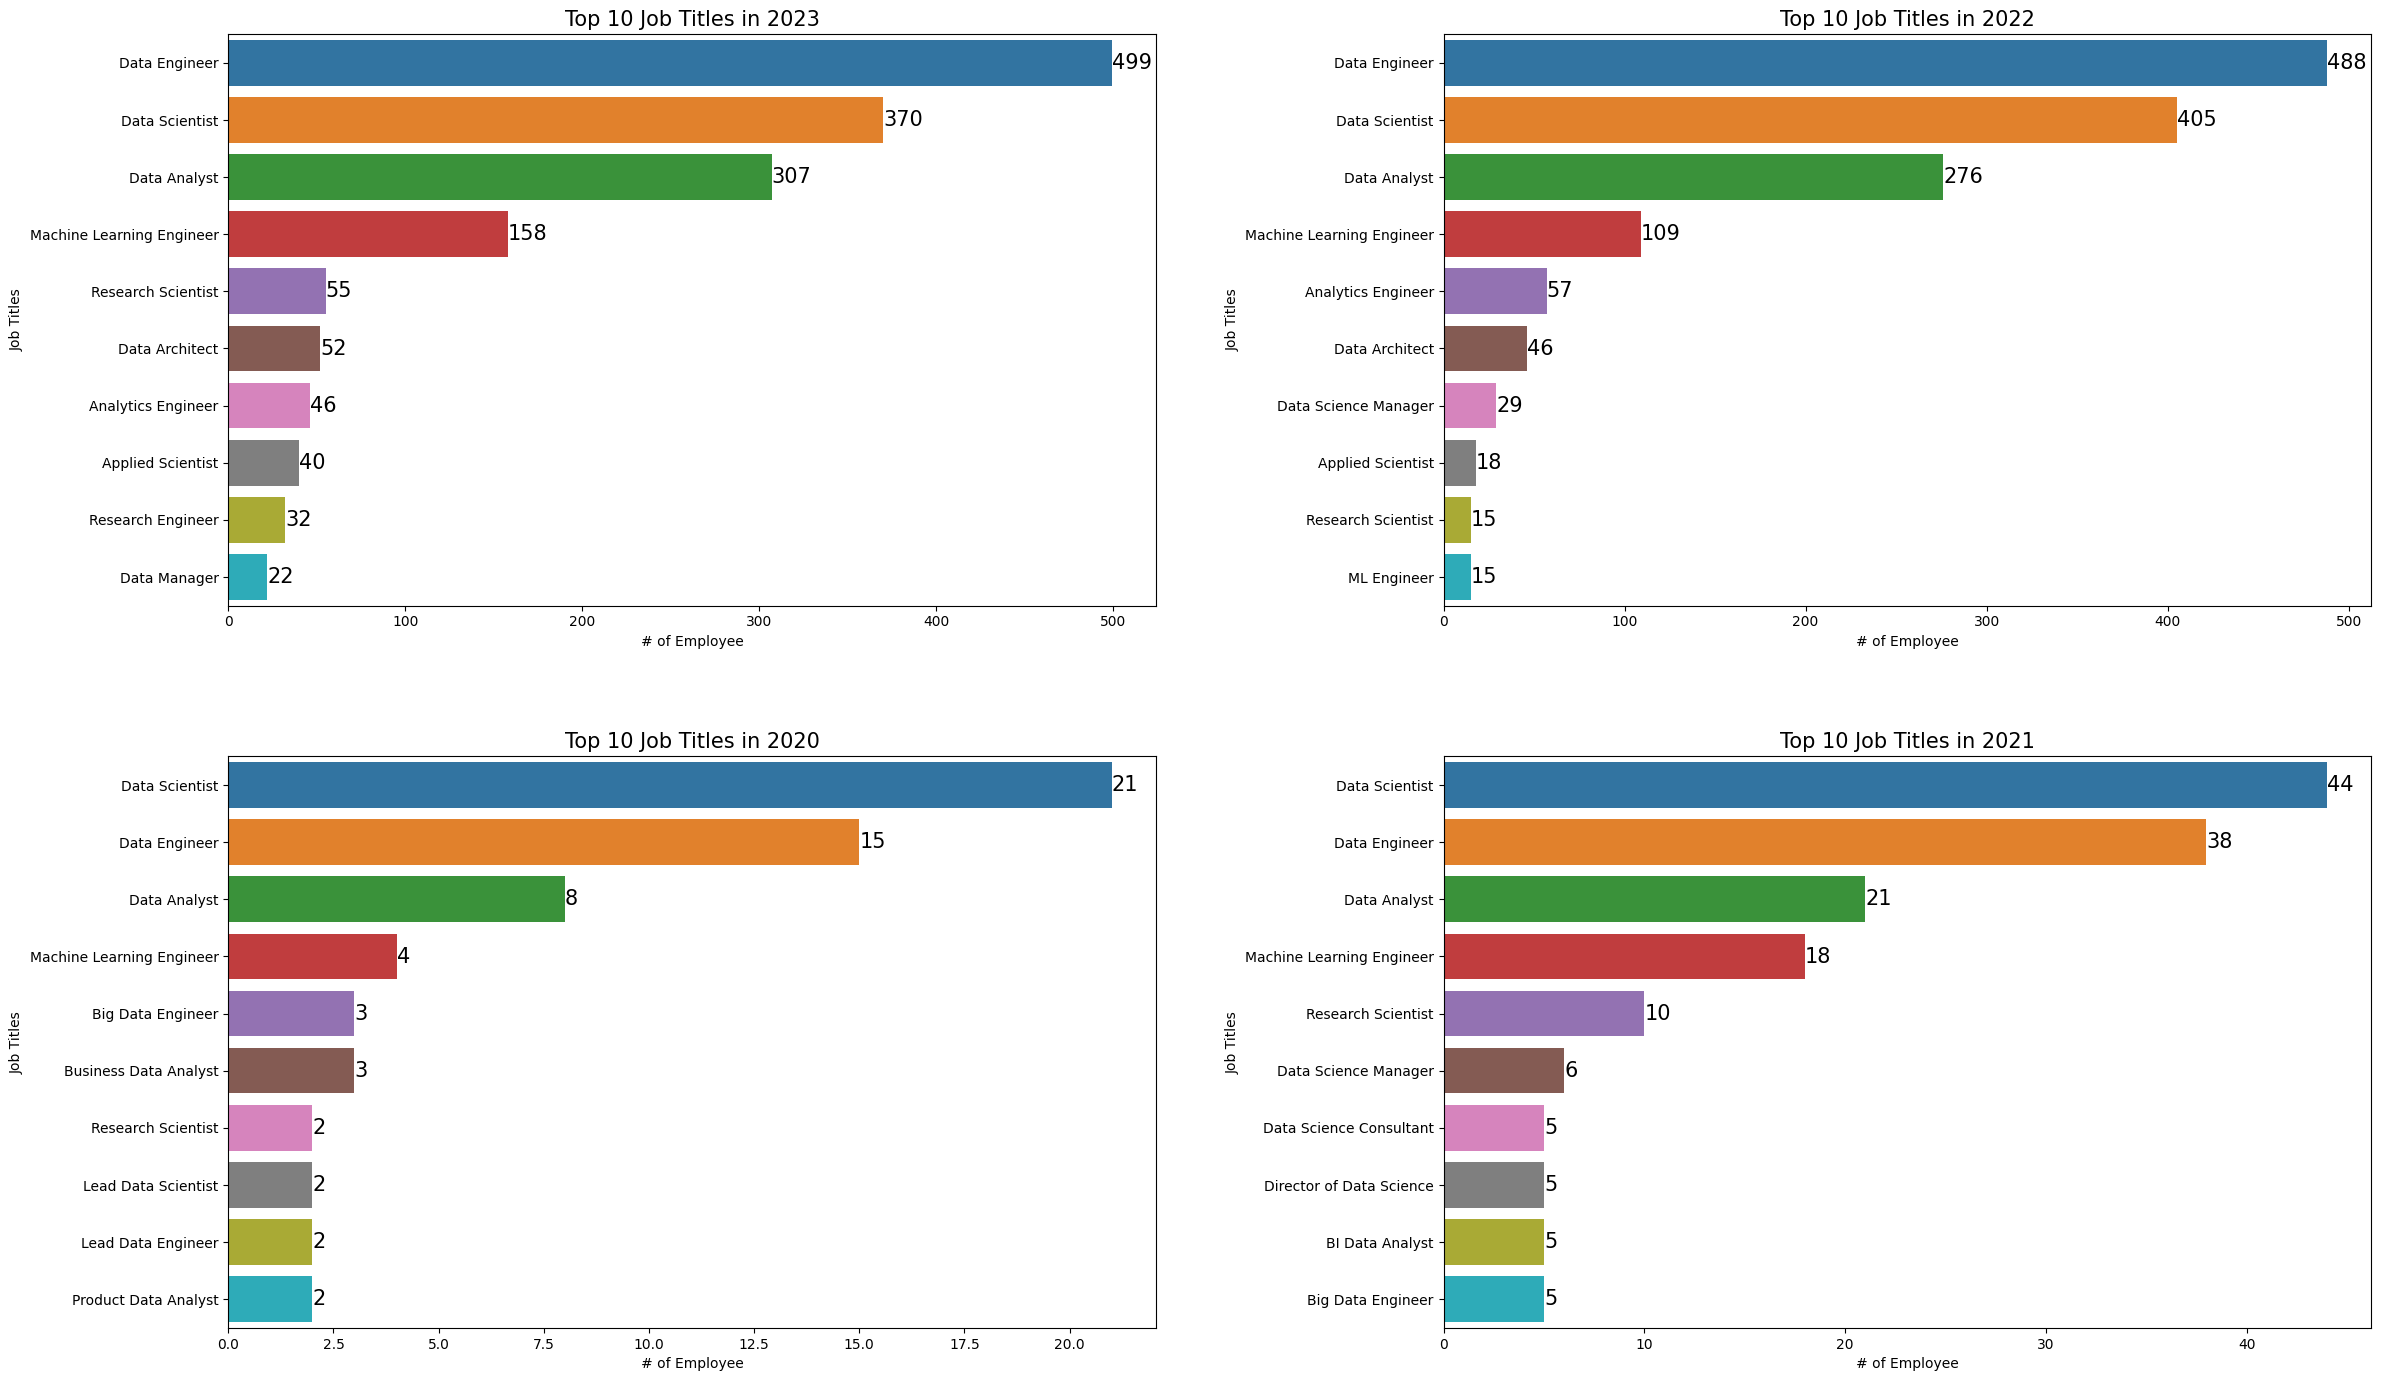

In [ ]:
# Top 10 Job Titles in past 4 years - 2020 to 2023
b = 1
fig = plt.figure(figsize = (25, 15))

for year in df.work_year.unique():
    dft = df[df['work_year']==year]['job_title'].value_counts().nlargest(10).reset_index()

    plt.subplot(2,2,b)
    ax = sns.barplot(data = dft , y = dft['index'], x = dft.job_title)
    plt.ylabel('Job Titles')
    plt.xlabel('# of Employee')
    plt.title(f'Top 10 Job Titles in {year}', size=15)
    ax.bar_label(ax.containers[0], size=15)
    b+=1

plt.tight_layout(pad=5.0, w_pad=5.0, h_pad=6.0)
plt.show()

As can be seen from 4 bar graphs above, we would recognized that:
*   The top four job titles in the Data Science industry remained consistent from 2020 to 2023, with Data Analyst, Data Engineer, Data Scientist, and ML Engineer being the most prominent roles.
*   The ranking of Data Analyst and ML Engineer remained unchanged throughout the entire time period, with Data Analyst consistently rating within the top three positions, and ML Engineer consistently placing as the fourth most popular job title.
*   However, a notable shift occurred in 2023, where Data Engineer surpassed Data Scientist to become the top-ranking job title, securing the first position in terms of popularity. This indicates a shifting landscape within the industry, with the increasing demand for Data Engineers and their expertise surpassing that of Data Scientists in 2023.

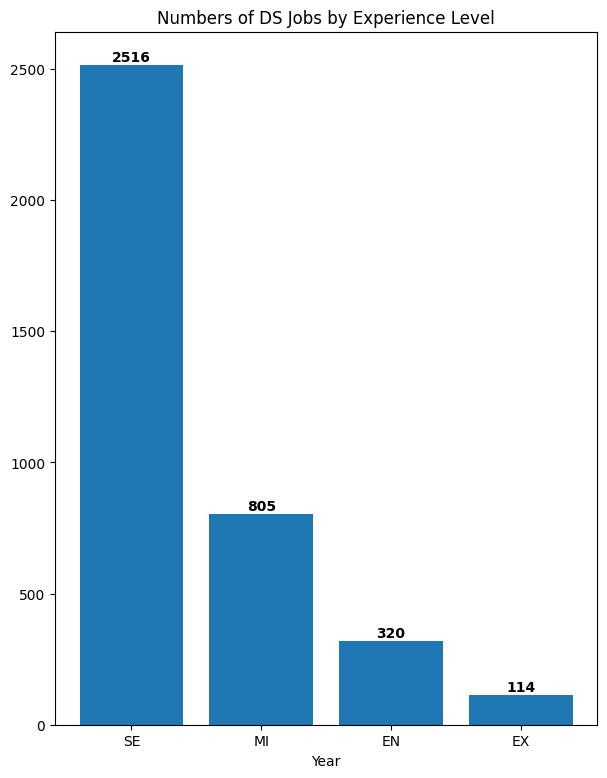

In [ ]:
# Display numbers of DS Jobs for each Experience Level by Bar charts
fig = plt.figure(figsize=(7,9))
x = [str(i) for i in df['experience_level'].value_counts().index]
y=df['experience_level'].value_counts().values.tolist()

plt.bar(x,y)

for i, v in enumerate(y):
    plt.text(i, v, str(v), ha='center', va='bottom', color='black', fontweight='bold')
plt.xlabel('Year')
plt.title('Numbers of DS Jobs by Experience Level')

plt.show()

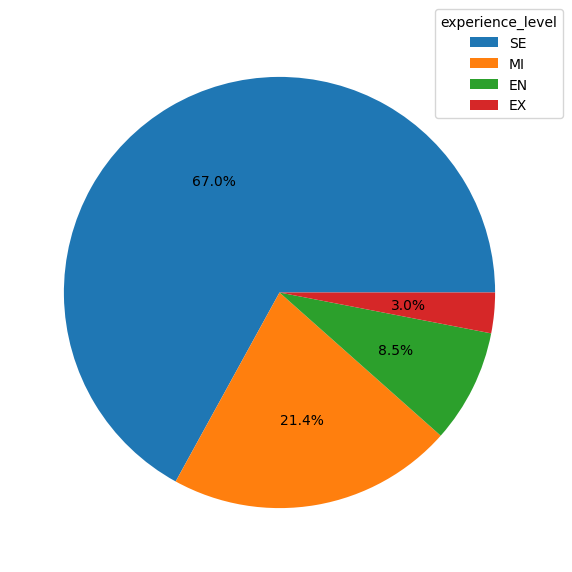

In [ ]:
# Display numbers of DS Jobs for each Experience Level by Pie chart
labels = df['experience_level'].value_counts().keys()
values = df['experience_level'].value_counts().values

fig = plt.figure(figsize=(7,7))

plt.pie(values, autopct='%1.1f%%')
plt.legend(labels, title='experience_level', loc='upper right', borderaxespad=-1)
plt.show()

The bar and pie charts above demonstrate the distribution of employees across experience levels within the industry which varies significantly.
*   Senior employees comprise the largest portion, accounting for a majority of the workforce at 67%
*   In contrast, executive members constitute the smallest percentage, representing only 3% of the total employee population

This highlights a hierarchical structure within the industry, with a higher concentration of professionals at the senior level compared to entry-level and executive positions.

In [ ]:
# Select top 3 job titles for each experience level
exp = df.groupby(['experience_level'])['job_title'].value_counts().groupby(level=0, group_keys=False).head(3)
exp

experience_level  job_title         
EN                Data Engineer          66
                  Data Analyst           63
                  Data Scientist         59
EX                Data Engineer          51
                  Data Scientist         12
                  Analytics Engineer      8
MI                Data Engineer         205
                  Data Analyst          167
                  Data Scientist        161
SE                Data Engineer         718
                  Data Scientist        608
                  Data Analyst          380
Name: job_title, dtype: int64

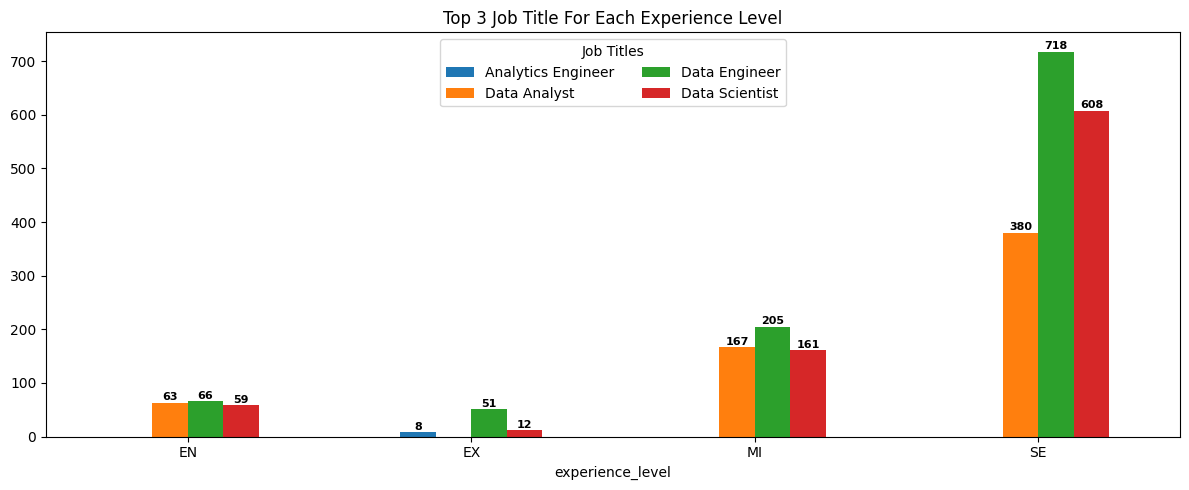

In [ ]:
# Create a bar plot displaying the top 3 job titles for each experience level
label_order = ['Analytics Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

ax = exp.unstack(level=1)[label_order].plot(kind='bar', figsize=(12,5))
ax.legend(loc='upper center', ncol=2, title='Job Titles')

for i in ax.patches:
  if i.get_height() != 0:
    ax.text(x = i.get_x() + i.get_width()/2,
            y = i.get_height()+10,
            s = int(i.get_height()),
            ha='center',
            va='center',
            size=8,
            weight='bold')

plt.title('Top 3 Job Title For Each Experience Level')
plt.xticks(rotation='horizontal', ha='center')
plt.tight_layout()

Some findings from the bar graphs above regarding Top 3 Job Titles for Each Experience Level are:
*   For entry, mid, and senior levels, data analyst, data engineer, and data scientist are the most common
*   At the executive level, there is a slight difference with analytics engineer replacing data analytics as a prominent title

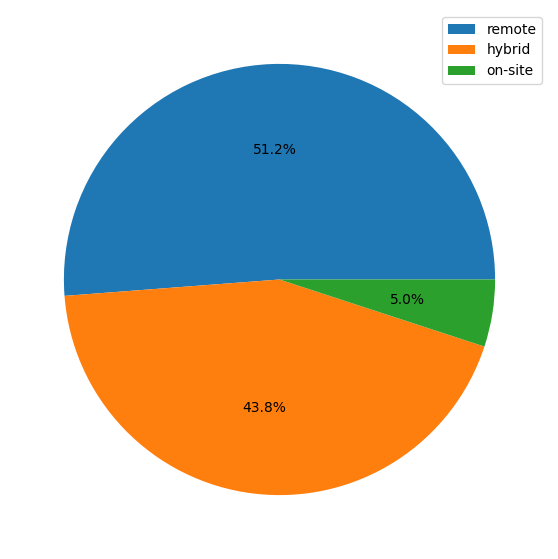

In [ ]:
# Display the percentage of Remote Workers using pie chart
labels = df['remote_ratio'].value_counts().keys()
values = df['remote_ratio'].value_counts().values

fig = plt.figure(figsize=(7,7))

plt.pie(values, autopct='%1.1f%%')
plt.legend(['remote', 'hybrid', 'on-site'], loc='upper right')
plt.show()

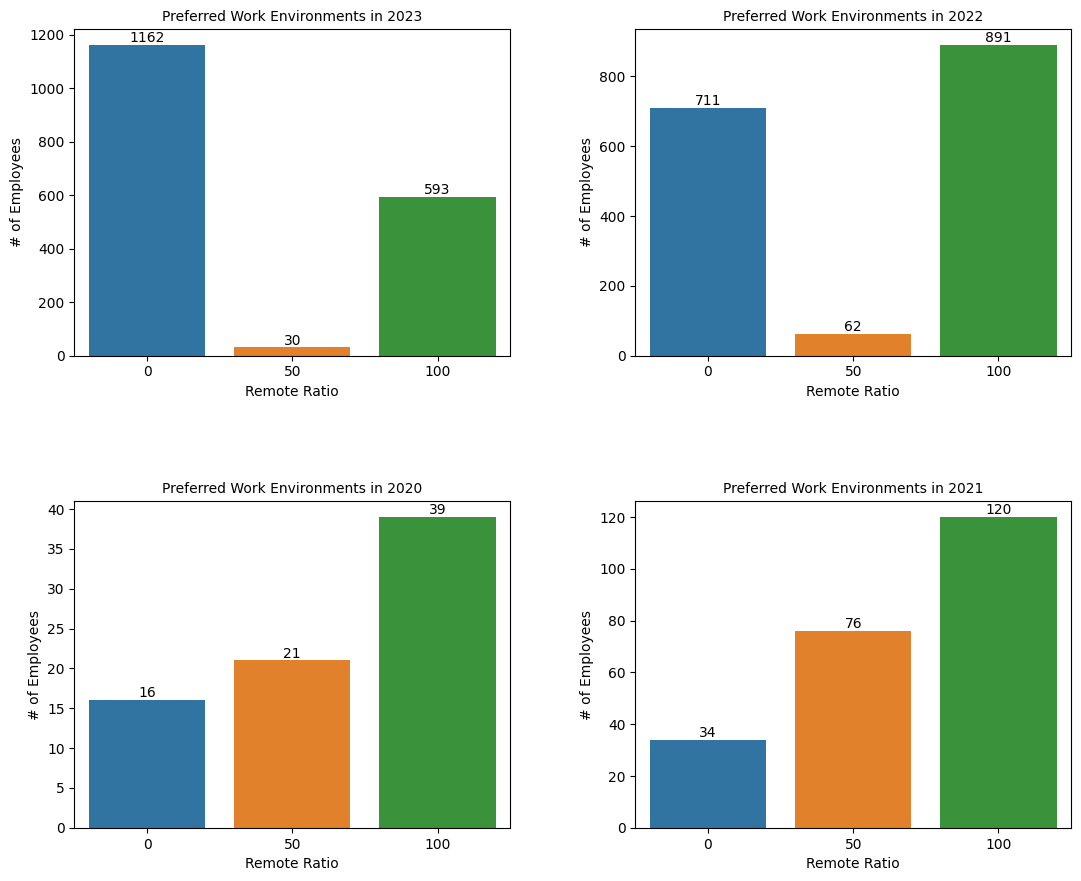

In [ ]:
c = 1
fig = plt.figure(figsize = (12, 10))

for year in df.work_year.unique():
    dft = df[df['work_year']==year]['remote_ratio'].value_counts().nlargest(10).reset_index()

    plt.subplot(2,2,c)
    ax = sns.barplot(data = dft , x = dft['index'], y = dft.remote_ratio)
    plt.ylabel('# of Employees')
    plt.xlabel('Remote Ratio')
    plt.title(f'Preferred Work Environments in {year}', size=10)
    ax.bar_label(ax.containers[0], size=10)
    c+=1

plt.tight_layout(pad=5.0, w_pad=5.0, h_pad=6.0)
plt.show()

The pie chart illustrates the distribution of work arrangements among workers, indicating that a significant portion of employees (43.8%) prefer a hybrid work setup, while the majority (51.2%) opt for remote work.

In terms of the bar graphs, we could see that:
*   A prominent trend in the industry is the steady rise in remote workers, reaching its highest percentage in 2023
*   This shift could be largely influenced by the COVID-19 pandemic in 2021, demonstrating the industry's adaptability and commitment to employee well-being while ensuring productivity

In [ ]:
# Install the'country_converter' package
!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.8 MB/s eta 0:00:00


In [ ]:
import plotly.express as px
import country_converter as coco

# Display the density of DS workers in the world - the darker, the more workers
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

residence = df['employee_residence'].value_counts()


fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn)

fig.update_layout(
    title={
        'text': 'Employee Location On Map',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

As can be seen from the map, the majority of employees in the data industry are concentrated in the United States, indicating it as the primary hub for professionals in this field.